In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro, levene, mannwhitneyu
import matplotlib.pyplot as plt

In [ ]:
'''
# --- 정규성 검정 ---
# - Group별 age 데이터
age1 = df.loc[df['survived'] == 1, 'age'].dropna()
age0 = df.loc[df['survived'] == 0, 'age'].dropna()

# - Shapiro 검정
stat1, p1 = shapiro(age1)
stat0, p0 = shapiro(age0)

# - 소수점 둘째 자리까지 반올림하여 출력
print(f"Survived=1: statistic={stat1:.2f}, pvalue={p1:.2f}")
print(f"Survived=0: statistic={stat0:.2f}, pvalue={p0:.2f}")

# - 전체 데이터 형태 확인
print("DataFrame shape:", df.shape)

# --- 등분산성 검정 ---
from scipy.stats import levene

# - 그룹별 age 데이터
group1 = df.loc[df['survived'] == 1, 'age'].dropna()
group2 = df.loc[df['survived'] == 0, 'age'].dropna()

# - Levene 검정
res = levene(group1, group2)

# - 통계량과 p-value 추출 후 소수점 둘째 자리까지 반올림해 출력
stat, pvalue = res.statistic, res.pvalue
print(f"Levene test: statistic={stat:.2f}, pvalue={pvalue:.2f}")

'''

In [41]:
df = pd.read_csv('/Users/hyeom/Documents/GitHub/advanced_project/jiwon_project/csv_files/preprocessing_filtered.csv', encoding = 'utf-8')

In [9]:
df.head(2)
df.columns

Index(['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'price', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'availability_60', 'availability_365',
       'instant_bookable', 'is_long_term', 'amenities', 'amenities_cnt',
       'room_type', 'structure_type', 'structure_category', 'accommodates',
       'bath_score_mul', 'beds', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'id', 'host_id',
       'name_length_group', 'description_length_group',
       'neighborhood_overview_exists', 'host_about_length_group',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_time_score', 'host_response_rate_score',
       'host_acceptance_rate_score', 'host_loc

In [26]:
# 귀무가설 : 슈퍼호스트 여부와 예상 수입 간의 차이가 없을 것이다
# 대립가설 : 슈퍼호스트라면 예상 수입이 다를 것이다

# --- EDA ---
# df = df[df['estimated_revenue_l365d'] !=0]

# - 정규성 검정
# 귀무가설: 데이터가 정규분포를 따른다
host_super = df.loc[df['host_is_superhost']==1, 'estimated_revenue_l365d'].dropna()
host_normal = df.loc[df['host_is_superhost']==0, 'estimated_revenue_l365d'].dropna()

stat1, p1 = shapiro(host_super)
stat0, p0 = shapiro(host_normal)

print(f"Survived=1: statistic={stat1:.4f}, pvalue={p1:.4f}")
print(f"Survived=0: statistic={stat0:.4f}, pvalue={p0:.4f}")
# p-value < 0.05로 귀무가설을 기각한다
# host_super, host_normal 모두 정규성을 따르지 않는다

# - 등분산성 검정
# 귀무가설: 두 그룹의 분산이 같다
stat, p = levene(host_super, host_normal)
print(f"Levene test: statistic={stat:.4f}, pvalue={p:.4f}")
# p-value < 0.05로 귀무가설을 기각한다

# - Mann-Whitney 검정
# 귀무가설 : 슈퍼호스트 여부와 예상 수입 간의 차이가 없을 것이다
group1 = df[df['host_is_superhost'] == 1]['estimated_revenue_l365d'].dropna()
group2 = df[df['host_is_superhost'] == 0]['estimated_revenue_l365d'].dropna()

stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
print(f"Mann–Whitney U test p-value: {p:.4f}")
# p-value < 0.05 로 귀무가설을 기각한다.
# 통계적으로 유의미하게 두 그룹(슈퍼호스트 vs 비슈퍼호스트)의 예상 수입 분포가 다르다

Survived=1: statistic=0.7408, pvalue=0.0000
Survived=0: statistic=0.4849, pvalue=0.0000
Levene test: statistic=26.0152, pvalue=0.0000
Mann–Whitney U test p-value: 0.0000


/Users/hyeom/PycharmProjects/statistics_2/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5345.
  res = hypotest_fun_out(*samples, **kwds)


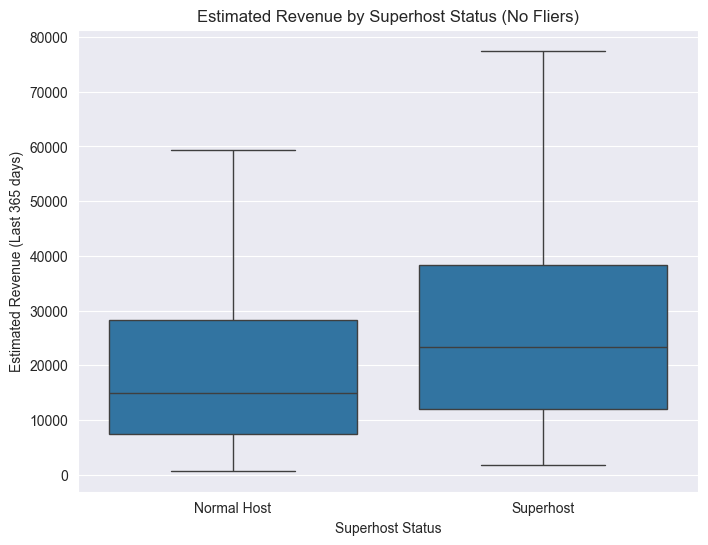

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='host_is_superhost',
    y='estimated_revenue_l365d',
    data=df,
    showfliers=False        # ← 이상치(점) 표시 안 함
)
plt.xticks([0, 1], ['Normal Host', 'Superhost'])
plt.title('Estimated Revenue by Superhost Status (No Fliers)')
plt.xlabel('Superhost Status')
plt.ylabel('Estimated Revenue (Last 365 days)')
plt.show()

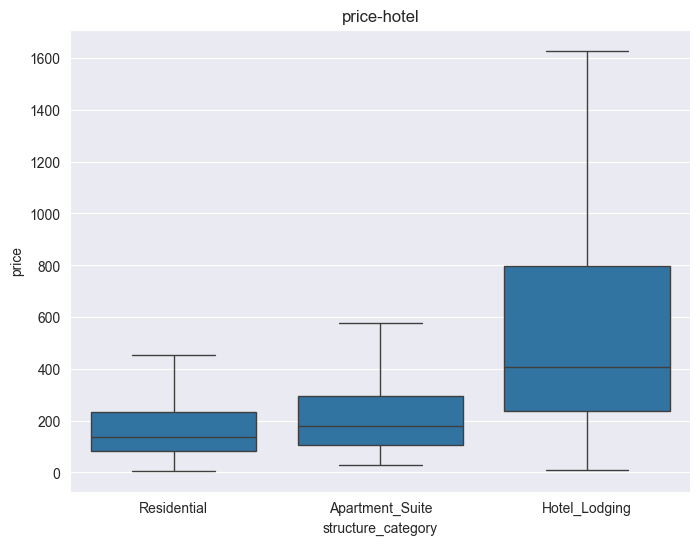

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='structure_category',
    y='price',
    data=df,
    showfliers=False       # ← 이상치(점) 표시 안 함
)

plt.xticks([0, 1, 2], ['Residential', 'Apartment_Suite', 'Hotel_Lodging'])
plt.title('price-hotel')
plt.xlabel('structure_category')
plt.ylabel('price')
plt.show()

In [29]:
df['structure_category'].unique()

array(['Residential', 'Apartment_Suite', 'Hotel_Lodging'], dtype=object)

In [43]:

col = "price"   # 이상치를 구할 대상 컬럼명으로 바꿔 주세요

# 1) 분위수 계산
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1
lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr

# 2) 이상치 여부 마스크
is_outlier = (df[col] < lower) | (df[col] > upper)

# 3) 비율 계산
outlier_ratio = is_outlier.mean()       # True=1, False=0 으로 간주
print(f"{col} 이상치 비율: {outlier_ratio:.2%}")


price 이상치 비율: 6.63%


In [45]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(df['last_review'], bins=10)
plt.title("Distribution of 'last_review' Dates")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'last_review'

<Figure size 1000x600 with 0 Axes>